# Datos
He elegido una base de datos que contiene información aportada por sensores sobre máquinas de distintos tipos con el fin de predecir fallos

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import scipy.stats
data=pd.read_csv('machine_failure_dataset.csv')
data

,Temperature,Vibration,Power_Usage,Humidity,Machine_Type,Failure_Risk
0,74.967142,56.996777,8.649643,20.460962,Mill,1
1,68.617357,54.623168,9.710963,25.698075,Lathe,0
2,76.476885,50.298152,8.415160,27.931972,Drill,1
3,85.230299,46.765316,9.384077,39.438438,Lathe,1
4,67.658466,53.491117,6.212771,32.782766,Drill,1
...,...,...,...,...,...,...
995,67.188997,55.350751,10.154961,30.142288,Lathe,1
996,87.976865,49.867394,10.515505,19.610941,Drill,0
997,76.408429,45.590627,7.516479,28.398511,Mill,0
998,64.288210,49.184665,10.668353,38.216891,Mill,1


In [5]:
print(data.describe())

       Temperature    Vibration  Power_Usage     Humidity  Failure_Risk
count  1000.000000  1000.000000  1000.000000  1000.000000   1000.000000
mean     70.193321    50.354181    10.011668    29.906404      0.300000
std       9.792159     4.987272     1.966909     5.135663      0.458487
min      37.587327    35.298057     3.960976    15.352757      0.000000
25%      63.524097    46.968792     8.704001    26.312898      0.000000
50%      70.253006    50.315386     9.999498    30.000923      0.000000
75%      76.479439    53.644411    11.321831    33.334727      1.000000
max     108.527315    65.965538    17.852475    46.215465      1.000000


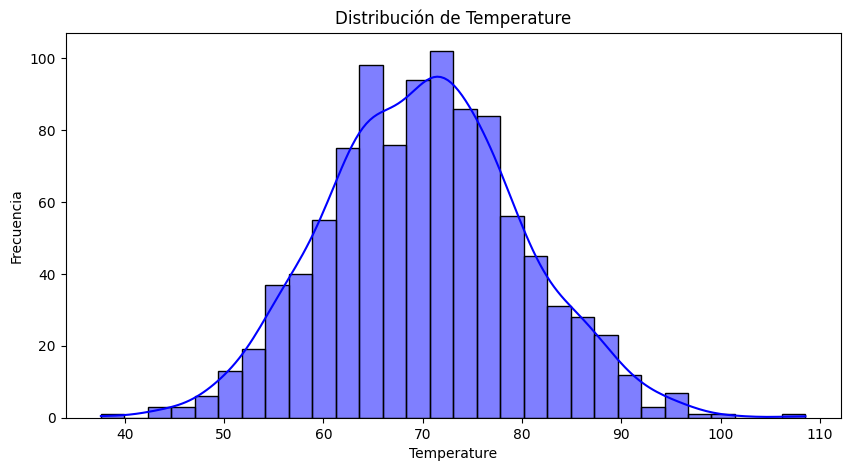

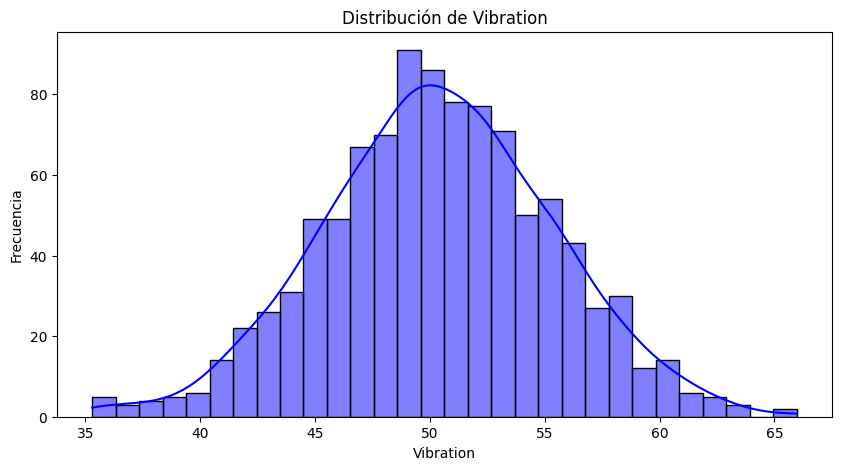

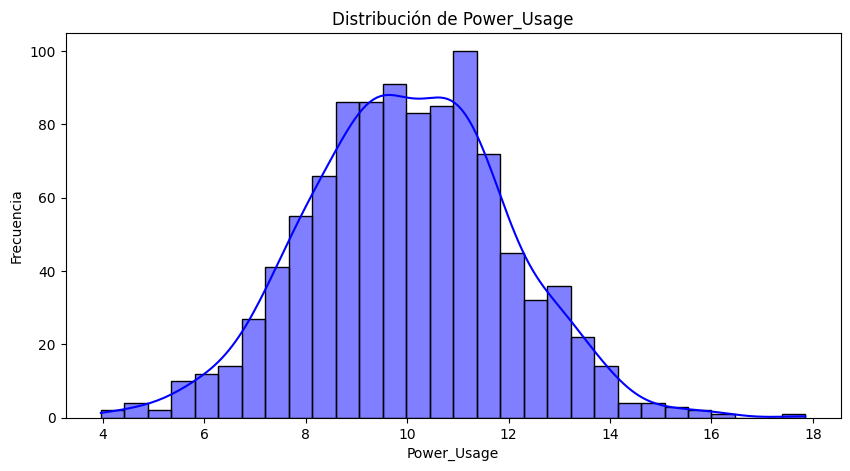

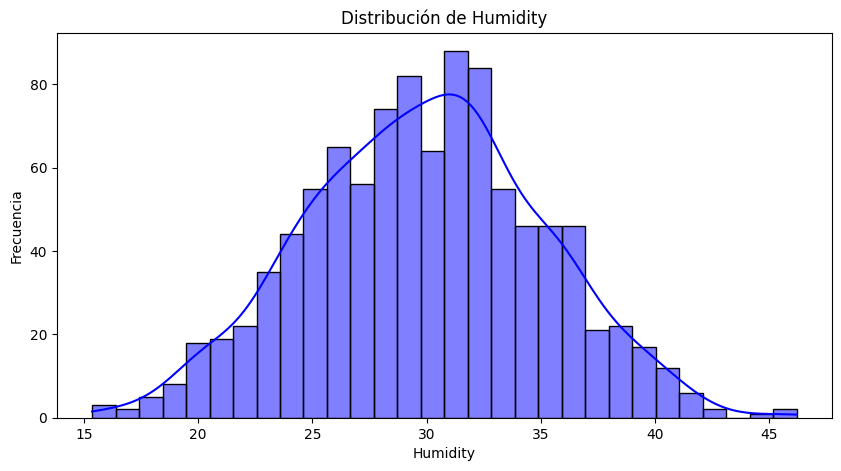

In [6]:
numeric_columns = ['Temperature', 'Vibration', 'Power_Usage', 'Humidity']

# Histograma y densidad para cada variable numérica
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()


## Ahora realizaremos los box plots

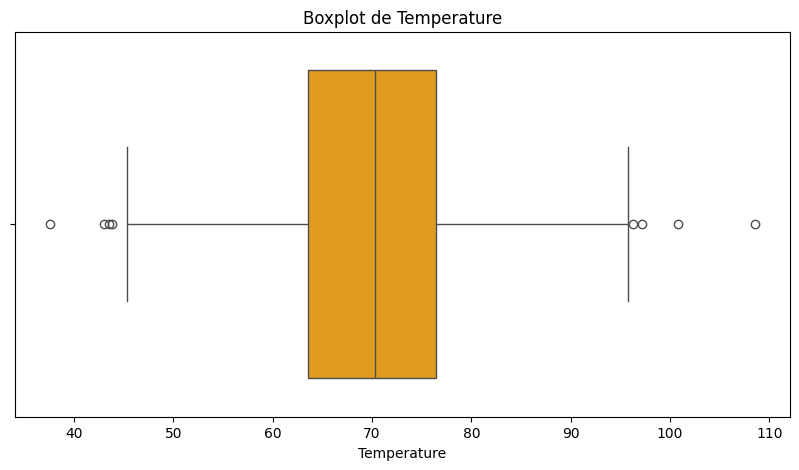

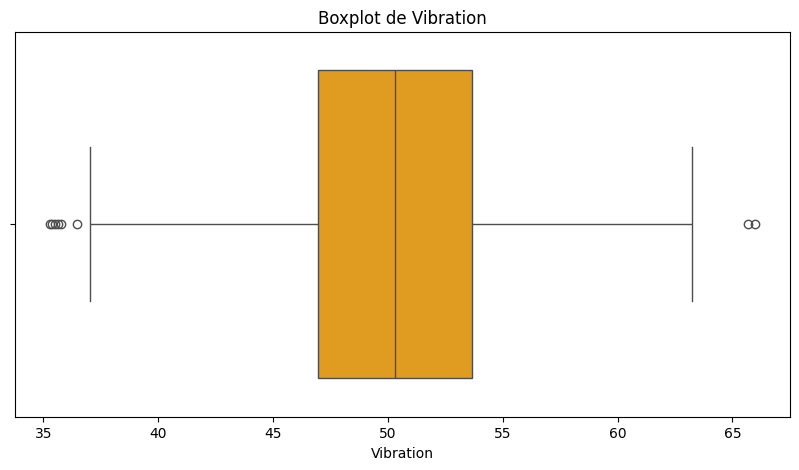

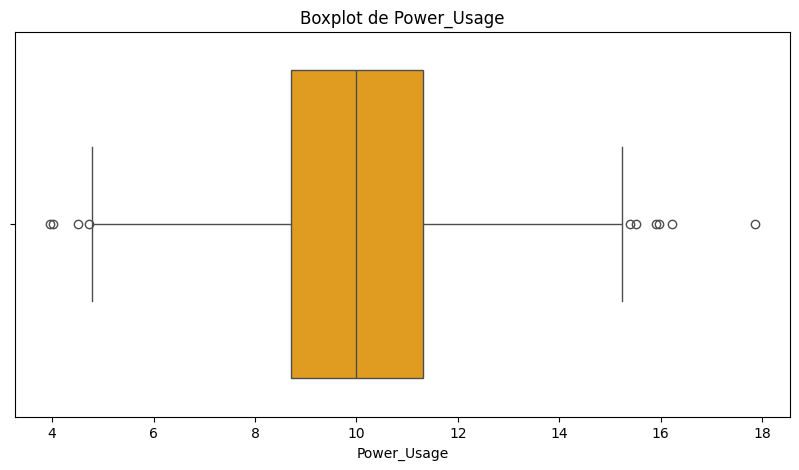

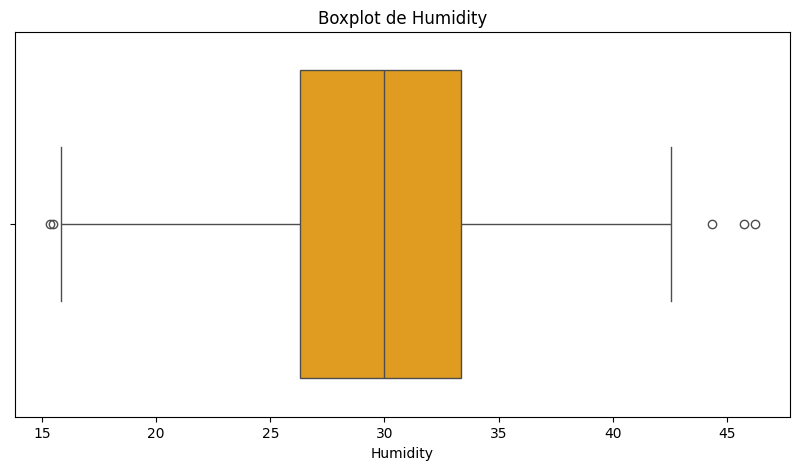

In [7]:
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[col], color='orange')
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.show()

## Veamos ahora las variables categóricas

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1880\4091346245.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


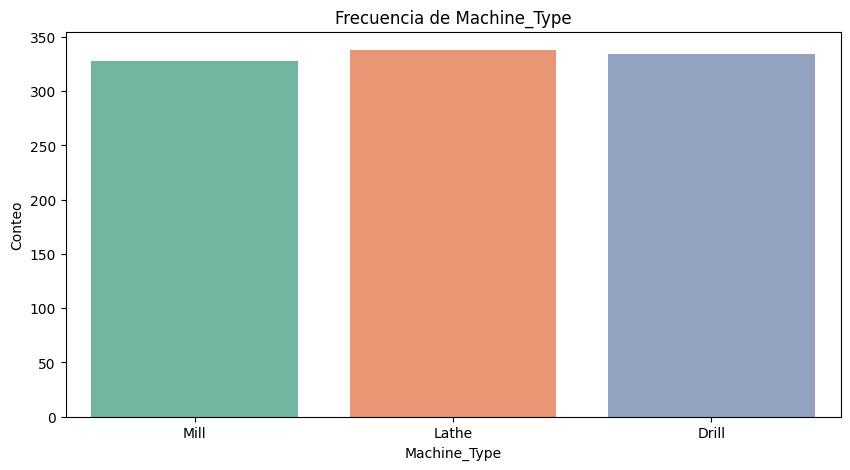

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1880\4091346245.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


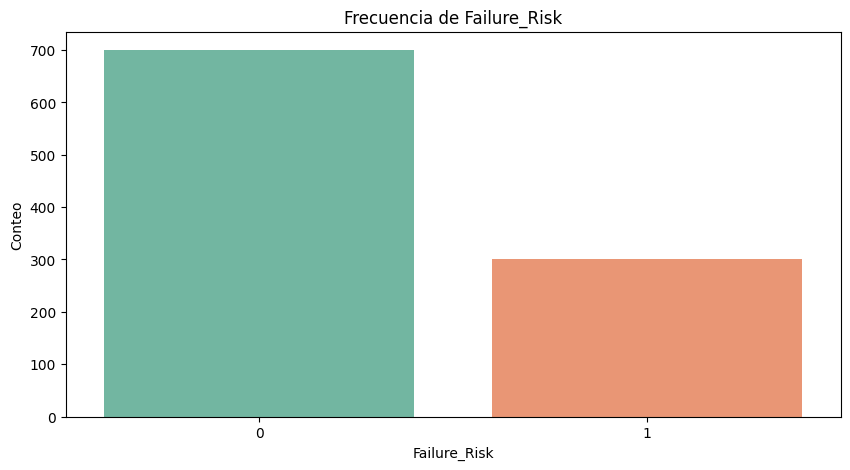

In [8]:
# Variables categóricas
categorical_columns = ['Machine_Type', 'Failure_Risk']

for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, x=col, palette='Set2')
    plt.title(f'Frecuencia de {col}')
    plt.xlabel(col)
    plt.ylabel('Conteo')
    plt.show()

In [9]:
from scipy.stats import skew, kurtosis

# Estadísticas avanzadas
for col in numeric_columns:
    print(f"\nAnálisis de {col}:")
    print(f"- Media: {data[col].mean()}")
    print(f"- Mediana: {data[col].median()}")
    print(f"- Moda: {data[col].mode()[0]}")
    print(f"- Sesgo (Skewness): {skew(data[col])}")
    print(f"- Curtosis (Kurtosis): {kurtosis(data[col])}")


Análisis de Temperature:
- Media: 70.19332055822001
- Mediana: 70.25300612
- Moda: 37.5873266
- Sesgo (Skewness): 0.11680083113709638
- Curtosis (Kurtosis): 0.0662058930195486

Análisis de Vibration:
- Media: 50.35418118632
- Mediana: 50.315385660000004
- Moda: 35.29805683
- Sesgo (Skewness): -0.0493217738344963
- Curtosis (Kurtosis): 0.05211754555053538

Análisis de Power_Usage:
- Media: 10.011668429042999
- Mediana: 9.9994984705
- Moda: 3.960975688
- Sesgo (Skewness): 0.06115473125619029
- Curtosis (Kurtosis): 0.16534715902233765

Análisis de Humidity:
- Media: 29.90640391106
- Mediana: 30.000922865
- Moda: 15.35275655
- Sesgo (Skewness): -0.0021182345932370668
- Curtosis (Kurtosis): -0.2341236185710116


Vemos que todas las variables parecen tener una distribución normal

## Ahora pasaremos al análisis bivariante

             Temperature  Vibration  Power_Usage  Humidity
Temperature     1.000000  -0.040400     0.022129 -0.013321
Vibration      -0.040400   1.000000    -0.011199 -0.054698
Power_Usage     0.022129  -0.011199     1.000000  0.021586
Humidity       -0.013321  -0.054698     0.021586  1.000000


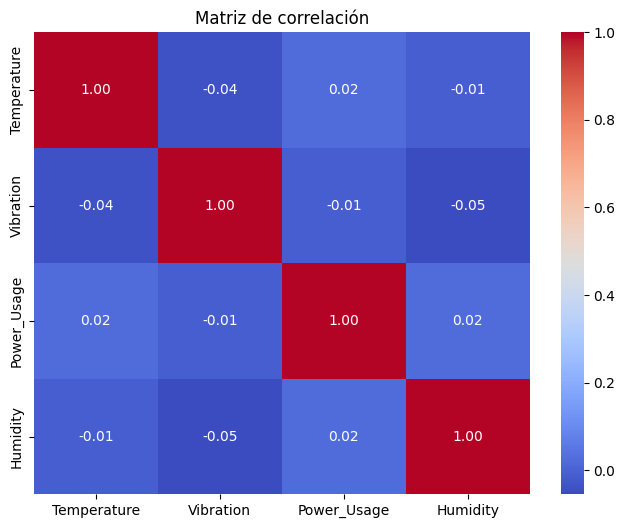

In [10]:
correlation_matrix = data[['Temperature', 'Vibration', 'Power_Usage', 'Humidity']].corr()
print(correlation_matrix)

# Mapa de calor para visualizar correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

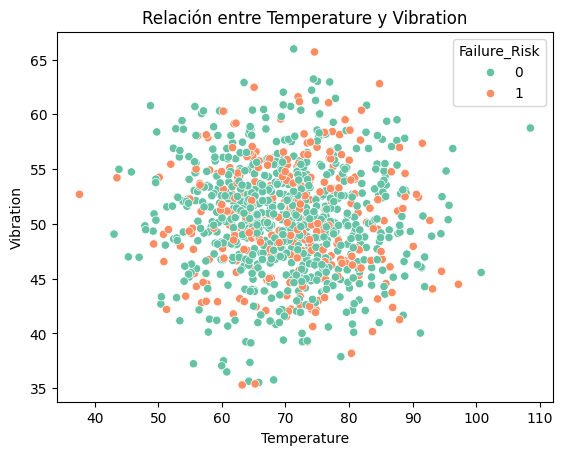

In [11]:
# Diagrama de dispersión entre dos variables
sns.scatterplot(data=data, x='Temperature', y='Vibration',hue='Failure_Risk', palette='Set2')
plt.title("Relación entre Temperature y Vibration")
plt.xlabel("Temperature")
plt.ylabel("Vibration")
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1880\899978405.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Machine_Type', y='Power_Usage', palette='Set3')


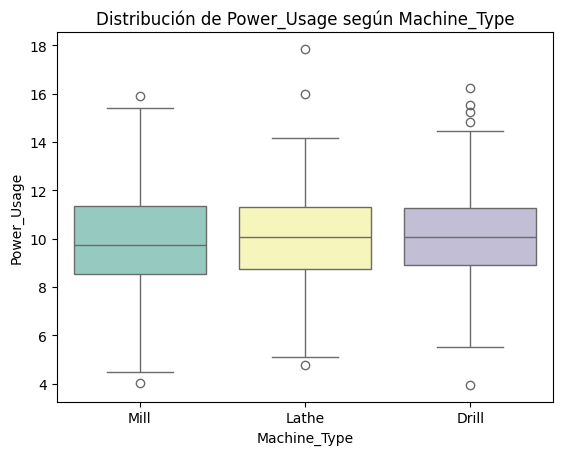

In [12]:
sns.boxplot(data=data, x='Machine_Type', y='Power_Usage', palette='Set3')
plt.title("Distribución de Power_Usage según Machine_Type")
plt.xlabel("Machine_Type")
plt.ylabel("Power_Usage")
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1880\2433680244.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Machine_Type', y='Humidity', palette='Set3')


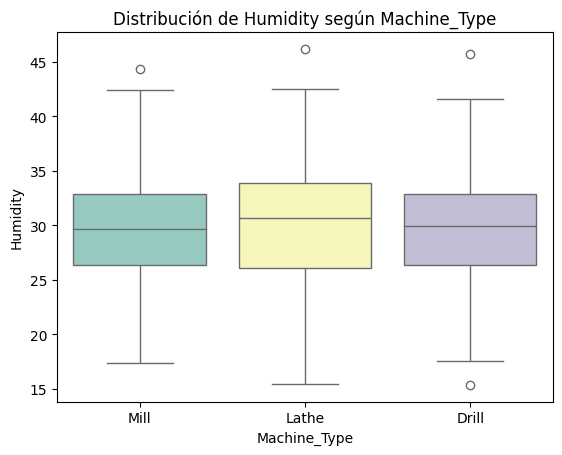

In [13]:
sns.boxplot(data=data, x='Machine_Type', y='Humidity', palette='Set3')
plt.title("Distribución de Humidity según Machine_Type")
plt.xlabel("Machine_Type")
plt.ylabel("Humidity")
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1880\1458781811.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Machine_Type', y='Temperature', palette='Set3')


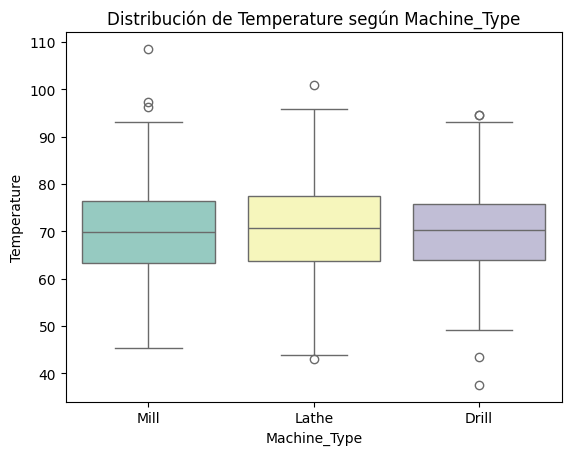

In [14]:
sns.boxplot(data=data, x='Machine_Type', y='Temperature', palette='Set3')
plt.title("Distribución de Temperature según Machine_Type")
plt.xlabel("Machine_Type")
plt.ylabel("Temperature")
plt.show()

A pesar de haber pequeños cambios en los rangos y outliers, vemos que para todas estas características, los 3 tipos de máquinas tienen distribuciones similares

In [15]:
# Tabla de contingencia entre Machine_Type y Failure_Risk
contingency_table = pd.crosstab(data['Machine_Type'], data['Failure_Risk'])
print(contingency_table)

Failure_Risk    0    1
Machine_Type          
Drill         230  104
Lathe         233  105
Mill          237   91


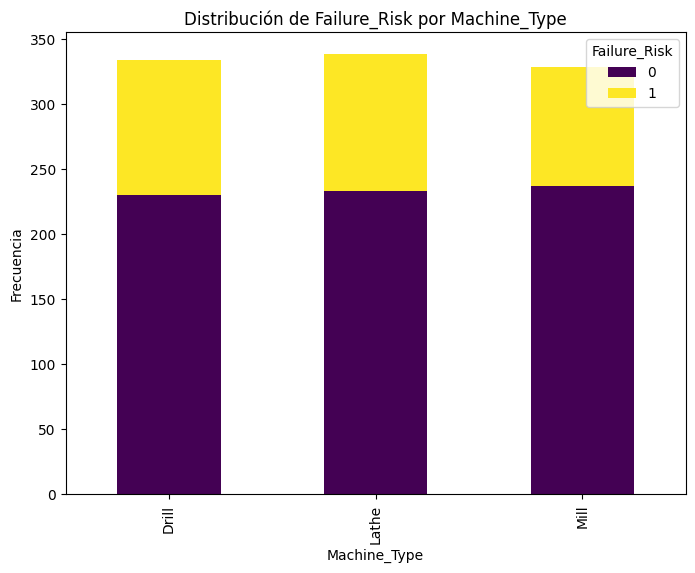

In [16]:
# Gráfico de barras apilado
contingency_table.plot(kind='bar', stacked=True, figsize=(8, 6), colormap="viridis")
plt.title("Distribución de Failure_Risk por Machine_Type")
plt.xlabel("Machine_Type")
plt.ylabel("Frecuencia")
plt.legend(title="Failure_Risk")
plt.show()

Aquí podemos ver que el Mill es el tipo de máquina que presenta menores fallos aun siendo la más abundante en el data set

In [18]:
from scipy.stats import ttest_ind

# Comparar Power_Usage entre dos tipos de Machine_Type
group1 = data[data['Machine_Type'] == 'Mill']['Power_Usage']
group2 = data[data['Machine_Type'] == 'Lathe']['Power_Usage']

t_stat, p_value = ttest_ind(group1, group2)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -0.8805465406666801, P-value: 0.37888189630525204


Como vemos en el p-value, no hay diferencias significativas entre los dos grupos

## 3. Comprobación de la normalidad de las variables

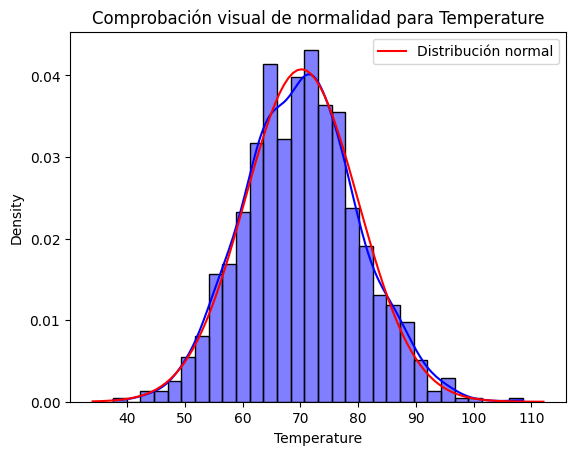

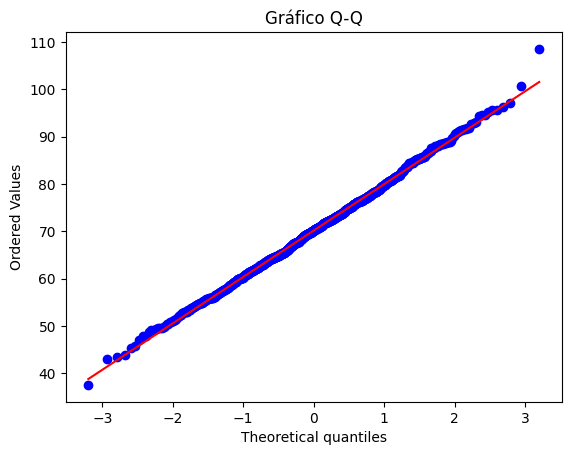

In [19]:
from scipy.stats import norm, probplot

# Variable a analizar
variable = 'Temperature'

# Histograma y curva de densidad normal
sns.histplot(data[variable], kde=True, color='blue', bins=30, stat='density')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, data[variable].mean(), data[variable].std())
plt.plot(x, p, 'r', label='Distribución normal')
plt.legend()
plt.title(f"Comprobación visual de normalidad para {variable}")
plt.show()

# Gráfico Q-Q
probplot(data[variable], dist="norm", plot=plt)
plt.title("Gráfico Q-Q")
plt.show()

Como hemos visto en los anteriores histogramas de las variables y como acabamos de comprobar en estos dos gráficos, nuestras variables numéricas siguen una distribución normal.
Ahora mostraremos los números que lo confirman

In [20]:
from scipy.stats import shapiro, kstest

# Prueba de Shapiro-Wilk
shapiro_stat, shapiro_p = shapiro(data['Temperature'])
print(f"Shapiro-Wilk Test: Estadístico={shapiro_stat}, p-valor={shapiro_p}")

# Prueba de Kolmogorov-Smirnov
kst_stat, kst_p = kstest(data['Temperature'], 'norm', args=(data['Temperature'].mean(),data[variable].std()))
print(f"Kolmogorov-Smirnov Test: Estadístico={kst_stat}, p-valor={kst_p}")

Shapiro-Wilk Test: Estadístico=0.9986092190566831, p-valor=0.6272578287327649
Kolmogorov-Smirnov Test: Estadístico=0.021396139036435613, p-valor=0.7412987960552239


Al ser p-valor >>> que 0,05 vemos que sigue una distribución normal

## 4. Estimación puntual y por intervalos de los parámetros poblacionales

In [21]:
variable = 'Power_Usage'
mean_point = data[variable].mean()
std_point = data[variable].std()

print(f"Media muestral de {variable}: {mean_point}")
print(f"Desviación estándar muestral de {variable}: {std_point}")

Media muestral de Power_Usage: 10.011668429042999
Desviación estándar muestral de Power_Usage: 1.9669085621371356


Pasamos a la estimación por intervalos de Confianza

In [22]:
from scipy.stats import norm
import numpy as np

# Configuración
confidence = 0.95  # Nivel de confianza del 95%
variable = 'Power_Usage'

# Parámetros muestrales
mean = data[variable].mean()  # Media muestral
std = data[variable].std()  # Desviación estándar muestral
n = len(data[variable])  # Tamaño de la muestra

# Valor Z para el nivel de confianza deseado
z_value = norm.ppf((1 + confidence) / 2)

# Margen de error
margin_error = z_value * (std / np.sqrt(n))

# Intervalo de confianza
ci_lower = mean - margin_error
ci_upper = mean + margin_error

print(f"Intervalo de confianza al 95% para la media de {variable}: ({ci_lower:.2f}, {ci_upper:.2f})")



Intervalo de confianza al 95% para la media de Power_Usage: (9.89, 10.13)


## 5. Realización de contrastes de hipótesis

Analizaremos ahora si hay diferencias de temperatura 
H0: las medias son iguales
H1: las medias no son iguales

In [23]:
from scipy.stats import norm
import numpy as np

# Definición de grupos
group1 = data[data['Machine_Type'] == 'Mill']['Power_Usage']
group2 = data[data['Machine_Type'] == 'Lathe']['Power_Usage']

# Parámetros muestrales
mean1, mean2 = group1.mean(), group2.mean()
std1, std2 = group1.std(), group2.std()
n1, n2 = len(group1), len(group2)

# Estadístico Z
z_stat = (mean1 - mean2) / np.sqrt((std1**2 / n1) + (std2**2 / n2))

# P-valor para prueba bilateral
p_value = 2 * (1 - norm.cdf(abs(z_stat)))  # Doble cola

print(f"Z-statistic: {z_stat:.3f}")
print(f"P-value: {p_value:.3f}")

Z-statistic: -0.880
P-value: 0.379


EL p-valor nos arroja que se cumple la hipótesis Ho.

## 6. Realización de ANOVA

In [24]:
from scipy.stats import levene

# Prueba de homogeneidad de varianzas (Levene)
stat, p = levene(data[data['Machine_Type'] == 'Mill']['Power_Usage'],
                 data[data['Machine_Type'] == 'Lathe']['Power_Usage'],
                 data[data['Machine_Type'] == 'Drill']['Power_Usage'])
print(f"Prueba de Levene: Estadístico={stat}, p-valor={p}")

Prueba de Levene: Estadístico=1.2020343371911832, p-valor=0.30101733382584767


In [25]:
from scipy.stats import f_oneway

# ANOVA
f_stat, p_value = f_oneway(data[data['Machine_Type'] == 'Mill']['Power_Usage'],
                           data[data['Machine_Type'] == 'Lathe']['Power_Usage'],
                           data[data['Machine_Type'] == 'Drill']['Power_Usage'])
print(f"ANOVA: F-statistic={f_stat}, p-value={p_value}")

ANOVA: F-statistic=1.093949262037375, p-value=0.33529293740286215


In [31]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ajustar el modelo de ANOVA
model = ols('Power_Usage ~ Machine_Type', data=data).fit()

# Realizar el ANOVA
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

                   sum_sq     df         F    PR(>F)
Machine_Type     8.462795    2.0  1.093949  0.335293
Residual      3856.397767  997.0       NaN       NaN


Como podemos ver en el test de Ánova, los dos grupos tienen las mismas medias muestrales ya que el PR>0.05.
A continuación realizaremos pruebas post-hoc

In [ ]:
race_pairs = []

for race1 in range(4):
    for race2  in range(race1+1,5):
        race_pairs.append((races[race1], races[race2]))

# Conduct t-test on each pair
for race1, race2 in race_pairs:
    print(race1, race2)
    print(stats.ttest_ind(voter_age[groups[race1]],
                          voter_age[groups[race2]]))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
 Drill  Lathe  -0.0882   0.83 -0.4444 0.2679  False
 Drill   Mill  -0.2245 0.3065 -0.5834 0.1343  False
 Lathe   Mill  -0.1363 0.6441 -0.4941 0.2215  False
---------------------------------------------------


group1,group2,meandiff,p-adj,lower,upper,reject
Drill,Lathe,-0.0882,0.83,-0.4444,0.2679,False
Drill,Mill,-0.2245,0.3065,-0.5834,0.1343,False
Lathe,Mill,-0.1363,0.6441,-0.4941,0.2215,False


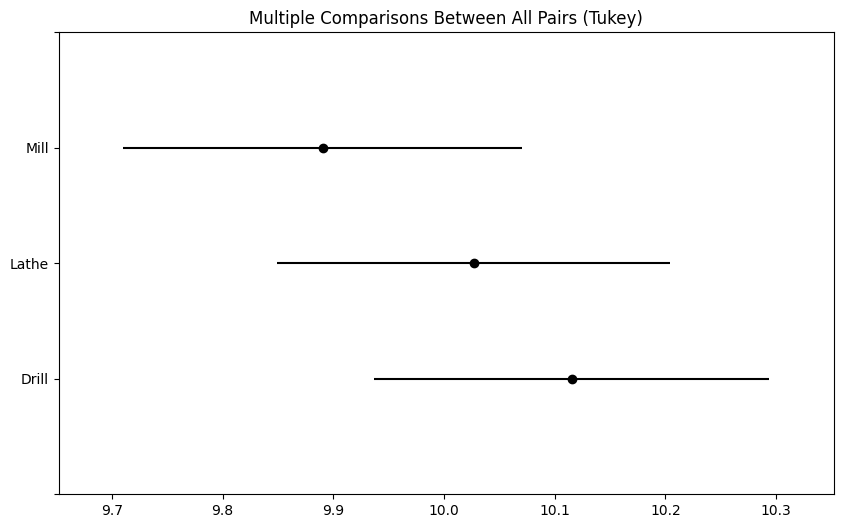

In [38]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Test de Tukey
tukey = pairwise_tukeyhsd(data['Power_Usage'], data['Machine_Type'], alpha=0.05)
print(tukey)

tukey.plot_simultaneous()    # Plot group confidence intervals

tukey.summary() 


Con esto podemos concluir que no hay diferencias significativas entre los grupos